# H-E-B Exploratory data analysis project

The dataset that I will be working with in this project, is data that is publicly available on the HEB.mx website, that I gathered and saved to a CSV file.

For this, I built a data scrapping python script that is available on my github page. The script I built using the beatiful soup library, as well as "requests" and the CSV libraries to save the data.
The script was able to save over 20K+ records with a whole lot of information about the HEB grocery chain products, such as the description of every item, the price in MXN currency, the brand name, department, as well as the date in which it was recorded. **The descriptions/product titles are in spanish because I scrapped the mexican HEB website**

In this Jupyter notebook I'll be taking a first look at the data, and doing some exploratory analysis from which I'll
answer the business questions I set out to work for;

- What brands provide the most amount of different products to HEB.
- What brands provide the most value to the grocery chain?
- What are the cheapest and the most expensive brands and items?
- What brands dominate each different department?
- What departments offer the highest diversity of product brands?

For this project, I'll make use of the following libraries, popular for being among the most useful for data analysts:
- Pandas
- Matplotlib

In future revisions of the data scrapper script, I'll write some code to be able to schedule it to run weekly and record 
pricing historical data, I'll also scrape the american website to make a pricing comparison.

From having historical data I will be able to answer a lot of different questions, the most interesting to me being:

- What is the observed inflation over time, in a basic grocery haul and which departments pricings have increased the most.


In [146]:
#Importing the neccesary libraries.
!pip install plotly==5.8.0
import pandas as pd
import sys
import matplotlib
import plotly.express as px

You should consider upgrading via the 'c:\users\sergio laptop\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [147]:
#Loading up the data.
groceries = pd.read_csv('heb-groceries-mex.csv')
groceries

,Product_Id,title,price,brand,department,store,date
0,2606178,Pasta Spaguetti Trigo Trigo Entero Spaghetti N...,$25.50,BARILLA,Abarrotes,HEB,05/07/2022
1,2604801,Pasta Codo Trigo Entero Pasta Codo Trigo Enter...,$25.50,BARILLA,Abarrotes,HEB,05/07/2022
2,2606177,Pasta Penne de Trigo Pasta Barilla Penne de Tr...,$25.50,BARILLA,Abarrotes,HEB,05/07/2022
3,2604802,Pasta Fusilli de Trigo Pasta Fusilli de Trigo ...,$25.50,BARILLA,Abarrotes,HEB,05/07/2022
4,1795105,Pasta Spaghetti Mediano 500 gr,$25.00,BARILLA,Abarrotes,HEB,05/07/2022
...,...,...,...,...,...,...,...
20402,1872949,Zero Carbs Sabor Fresa en Polvo 1000 gr,"$1,096.00",PRO WINNER,Saludable,HEB,05/07/2022
20403,1872943,W.P. Master Sabor Fresa 500 gr,$434.00,PRO WINNER,Saludable,HEB,05/07/2022
20404,1801753,Suero de Leche Suero de Leche Chocolate 500 gr,$678.00,PRO WINNER,Saludable,HEB,05/07/2022
20405,2558460,Harina de Coco sin Azucar 1 kg,$176.00,NaN,Saludable,HEB,05/07/2022


## Cleaning the data
Now that the dataset has been imported correctly into the notebook it's time to do a few modifications to it.
These are some of the things I think would be good to correct now, to make it easier to understand, and to avoid issues down the line. 

- Replacing column names to make them more accurate.
- Translating the department names from spanish to english, which is easier to understand for more people.
- Replacing null values with more specific values.
- Find and fill missing data.
- Convert datatypes if they are not appropiate.
- Look for outliers, and possible mistaken imputs.


In [148]:
#First of all, I want to see what our columns are named, just as standard practice.
groceries.columns

Index(['Product_Id', 'title', 'price', 'brand', 'department', 'store', 'date'], dtype='object')

In [149]:
#Changing the column names to be more accurate.
groceries = groceries.rename(columns={'title' : 'item_description', 'price' : 'price_mxn'})
groceries.columns

Index(['Product_Id', 'item_description', 'price_mxn', 'brand', 'department',
       'store', 'date'],
      dtype='object')

In [150]:
#Counting missing values and replacing them.
groceries.isna().sum()
groceries["brand"].fillna("Unknown" , inplace = True)

In [151]:
#Seems interesting, it appears to be that there were 965 items with no known brand. There's also some date information
#missing, though this is certainly an error caused by the data scrapper. To clean up the dataset, I replaced null
#values with "Unknown". As for the date, I will simply fill the missing values with the correct date, the date the script was
#last deployed.
groceries[groceries['date'].isna()]

,Product_Id,item_description,price_mxn,brand,department,store,date
8196,1813204,Top Sirloin de Res 1 kg,$246.00,HEB SUPREME,Carnes y Pescado,05/07/2022,NaN
8197,1808932,Sirloin C/H para Asar 1 kg,$195.00,HEB EXTRASUAVE,Carnes y Pescado,05/07/2022,NaN
8198,1813216,Aguja Norteña C/H de Res 1 kg,$246.00,HEB SUPREME,Carnes y Pescado,05/07/2022,NaN
8199,1800052,Rib Eye S/H de Res 1 kg,$761.00,CAB,Carnes y Pescado,05/07/2022,NaN
8200,2500418,Costilla Short Rib de Res 1 kg,$246.00,HEB SUPREME,Carnes y Pescado,05/07/2022,NaN
...,...,...,...,...,...,...,...
8803,2500139,Lobina Rayada Entera Fresca 1 kg,$349.00,HEB,Carnes y Pescado,05/07/2022,NaN
8804,1775188,Salsa Seafood Fiordo 140 gr,$48.00,FIORDO,Carnes y Pescado,05/07/2022,NaN
8805,1729420,Mejillones en Salsa de Tomate 1 kg,$196.00,NORDKINN,Carnes y Pescado,05/07/2022,NaN
8806,1709617,Langostino Entero Prev. Cong 1 kg,$690.00,Unknown,Carnes y Pescado,05/07/2022,NaN


Having this information displayed, it is evident that all of the rows with missing data, belong to the 'Meat and fish'
department. Clearly a fault of the data scrapper script. 
I will fill these missing values with the correct date it should have passed over to the .csv file.

In [152]:
groceries["date"].fillna("05/07/2022" , inplace = True)
groceries[groceries['date'].isna()]
#It appears we have successfully replaced all null values

,Product_Id,item_description,price_mxn,brand,department,store,date


Now, I consider it a good idea to translate some information for the sake of the person reading this document, and also to show off the fact that I know how to do that :)

In [153]:
#Printing the unique values in the department column, to know what I'll change it to.
groceries.department.unique()

#Translating the department names from english to spanish, to make it easier to understand for everybody.
groceries = groceries.replace({'department' : {'Abarrotes' : 'Groceries', 'Frutas-Verduras' : 'Fruits and vegetables', 'Lacteos' : 'Dairy products' 
                                  ,'Carnes y Pescado' : 'Meat and Fish', 'Congelados' : 'Frozen products', 'Salchichoneria': 'Sausages',
                                   'Bebidas y Botanas': 'Drinks and Snacks', 'Panaderia y Tortillas' : 'Bakery and tortillas', 'Reposteria y horneado' : 'Baking',
                                  'Dulceria': 'Candies', 'Limpieza': 'Cleaning', 'Internacional': 'International', 'Saludable': 'Healthy products'}})

In [154]:
#These are the updated names of the departments.
groceries.department.unique()

array(['Groceries', 'Fruits and vegetables', 'Dairy products',
       'Meat and Fish', 'Frozen products', 'Sausages',
       'Drinks and Snacks', 'Bakery and tortillas', 'Baking', 'Candies',
       'Cleaning', 'International', 'Healthy products'], dtype=object)

## Data Types
Now that I've cleaned up the data, and formatted to my liking. I need to make it easy to work on by converting the columns to the most appropiate data type, if they're not already.

In [155]:
groceries.dtypes

Product_Id           int64
item_description    object
price_mxn           object
brand               object
department          object
store               object
date                object
dtype: object

Here we can see that most of the columns are object data types, which are panda's version of string like items. The only column that is an integer tipe and that can be used in calculations is the Product_Id column, which won't even help because the number is only for identification purposes.

Since I ideally want to make calculations from different columns, mainly the price_mxn and the date columns, I need to convert those to something that is easy to work with. The price_mxn will be converted to a float type, and the date column to a special date object.


In [156]:
#In this code chunk I'll remove the money sign from the price_mxn and convert that column to an integer type.
groceries['price_mxn'] = groceries['price_mxn'].str.replace('$', '')
groceries['price_mxn'] = groceries['price_mxn'].str.replace(',', '')
groceries['price_mxn'] = groceries['price_mxn'].astype(float)

C:\Users\Sergio Laptop\AppData\Local\Temp\ipykernel_21888\2373583260.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [157]:
#Trying to see if the changes were correctly made.
groceries.head(10)

,Product_Id,item_description,price_mxn,brand,department,store,date
0,2606178,Pasta Spaguetti Trigo Trigo Entero Spaghetti N...,25.5,BARILLA,Groceries,HEB,05/07/2022
1,2604801,Pasta Codo Trigo Entero Pasta Codo Trigo Enter...,25.5,BARILLA,Groceries,HEB,05/07/2022
2,2606177,Pasta Penne de Trigo Pasta Barilla Penne de Tr...,25.5,BARILLA,Groceries,HEB,05/07/2022
3,2604802,Pasta Fusilli de Trigo Pasta Fusilli de Trigo ...,25.5,BARILLA,Groceries,HEB,05/07/2022
4,1795105,Pasta Spaghetti Mediano 500 gr,25.0,BARILLA,Groceries,HEB,05/07/2022
5,1795102,Pasta Tornillo 500 gr,24.5,BARILLA,Groceries,HEB,05/07/2022
6,1779904,Pasta Fettuccine 500 gr,25.0,BARILLA,Groceries,HEB,05/07/2022
7,1795108,Pasta Spaghetti Grande 500 gr,24.5,BARILLA,Groceries,HEB,05/07/2022
8,1635046,Tostadas de Maiz Horneadas 216 gr,32.0,SANISSIMO,Groceries,HEB,05/07/2022
9,1741165,Tostadas de Maiz con Nopal 200 gr,31.0,SUSALIA,Groceries,HEB,05/07/2022


## Data analysis
Now that the data is clean it's time to start digging into it to look for insights into the way this grocerie chain operates, what suppliers they get their products from, etc.
I'll start by plotting a histogram of the different brands across all the departments.

<AxesSubplot:>

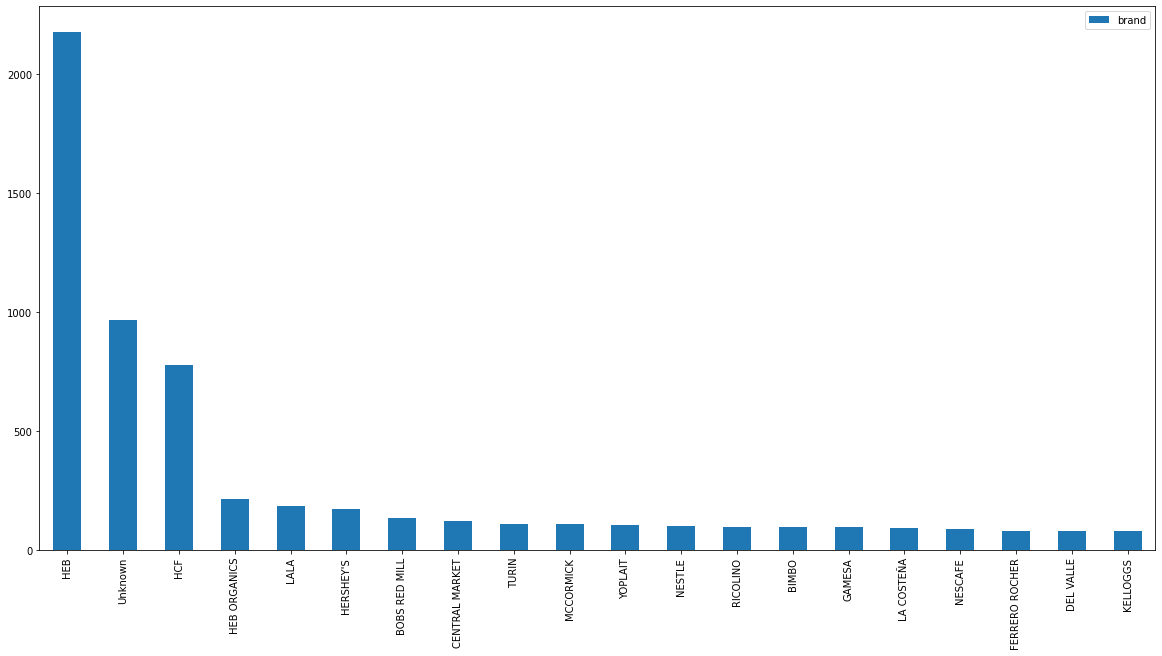

In [158]:
#Plotting a histogram of the brand category to see what brands provide the most products to HEB.
brand_spread = pd.DataFrame(groceries['brand'].value_counts())
#The spread would be too large to read so it would be better to only plot the top 20 brands.
brand_spread.head(20).plot(kind='bar', figsize=(20,10))
#pd.DataFrame(groceries['brand'].value_counts()).plot(kind='bar', figsize=(20,10))


This plot does show a lot of interesting things. The amount of different products that HEB itself makes is staggering. 
From a little internet investigating I learned that the brand HCF(Hill Country Fare) is another brand that HEB owns.
So HEB sells in total almost 3500 different products out of the 20K+, made by itself. 
From personal experience I know that "LALA" is a mexican company that sells dairy products, and that the following brands
make few different products by comparison.

I'll now make create a new smaller dataframe that will take a count of how many products each brand makes and the total percentage out of the whole it represents.



In [159]:
brand_spread["product_percentage"] = (brand_spread['brand']/20407) * 100
brand_spread.head(10)


,brand,product_percentage
HEB,2175,10.658108
Unknown,965,4.728770
HCF,778,3.812417
HEB ORGANICS,213,1.043759
LALA,186,0.911452
HERSHEY'S,171,0.837948
BOBS RED MILL,133,0.651737
CENTRAL MARKET,120,0.588034
TURIN,110,0.539031
MCCORMICK,108,0.529230


**HEB brands make up for approximately 15% of the available products they sell.** By comparison, all other brands become much less significant in the total spread.

I am really curios to learn why a lot of the products brand information came up as Unknown, or better said, why that data wasn't readily available in the website the data was pulled from.

I'll take a deeper look into this.

In [160]:
#Returning all information from items where the brand is 'Unknown'
unknown_brand_data = groceries.loc[(groceries['brand'] == 'Unknown')]
unknown_brand_data.head(100)

,Product_Id,item_description,price_mxn,brand,department,store,date
227,1718851,Tajín Azul Salsa en Polvo 142g 142 gr,33.9,Unknown,Groceries,HEB,05/07/2022
299,2602660,Sabanitas Tortillas de Maíz Nopal Bajas en Cal...,29.0,Unknown,Groceries,HEB,05/07/2022
300,2602659,Sabanitas Tortillas de Maíz Bajas en Cal 400 gr,29.0,Unknown,Groceries,HEB,05/07/2022
454,2578593,Aceite Vegetal Gran Tradición Aceite Vegetal M...,41.9,Unknown,Groceries,HEB,05/07/2022
493,1906144,Tortilla de Maíz Fría Amarilla 800 gr,20.5,Unknown,Groceries,HEB,05/07/2022
...,...,...,...,...,...,...,...
5057,1656793,Tortilla Harina Taquera 25pz,30.9,Unknown,Groceries,HEB,05/07/2022
5102,1793791,Frijol de Soya 1 kg,36.0,Unknown,Groceries,HEB,05/07/2022
5103,1793776,Comino 1 kg,133.0,Unknown,Groceries,HEB,05/07/2022
5127,2507731,Pimienta Limon 1 kg,133.0,Unknown,Groceries,HEB,05/07/2022


There seems to be no obvious reason as to why these items don't have brand information on the website. Perhaps it could be because they are locally sourced items. 

This was important to know how to proceed with the analysis. These items without brand information will be kept separate for now.

At this poit it would be interesting to know hoy much value each brand provides for the grocerie store chain, just as a point of view of the catalog of items, since we don't have access to sales information.


In [161]:
#Doing an 'aggregation' of values, grouping them by certain columns.
#Important: Since the output of the group by function is a data frame without index, we need to use "reset_index".
departmentBrandPricing = groceries.groupby(['department', 'brand']).price_mxn.agg(['count', 'min', 'max', 'mean']).reset_index()
departmentBrandPricing.head(100)

,department,brand,count,min,max,mean
0,Bakery and tortillas,ALMADEN,3,23.0,33.5,26.500000
1,Bakery and tortillas,AVELINA,1,55.5,55.5,55.500000
2,Bakery and tortillas,AZUCENA,3,34.5,34.5,34.500000
3,Bakery and tortillas,BELEN,3,62.9,62.9,62.900000
4,Bakery and tortillas,BIMBO,31,25.0,59.0,43.451613
...,...,...,...,...,...,...
95,Baking,BAKERY CAKE,4,90.0,90.0,90.000000
96,Baking,BAKERY CRAFTS,36,40.0,209.0,62.058333
97,Baking,BAKERYCAKE,2,90.0,90.0,90.000000
98,Baking,BARONIE,3,57.0,92.0,68.666667


This new dataFrame contains a lot of very useful metrics for each brand and the departments they are the most present in. It would be very useful to plot this information to gain a better understanding of it.

I will do develop a dashboard where this information can be better visualized, to do this I will save it into a new .csv file to further dig into it.

In [162]:
#Exporting .csv file to directory for further analyzing
departmentBrandPricing.to_csv('departmentBrandPricing.csv', index=True)

Even though it isn't ideal, python offers some plotting or visualizing options. They are not ideal, because they don't offer much customization, and they're simply crude. They can still be useful, which is why I'll plot this data in this way too.

In [163]:
#This plot will give me the top 10 brands in each department by amount of products, and will color scale it to the average
#item cost.
departmentBrandPricingPlot = departmentBrandPricing.query("department == 'Groceries'")
departmentBrandPricingPlot = departmentBrandPricingPlot.sort_values('count', ascending=False)
fig = px.bar(departmentBrandPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Groceries or pantry items")
fig.show()


In [164]:
FVDepartmentPricingPlot = departmentBrandPricing.query("department == 'Fruits and vegetables'")
FVDepartmentPricingPlot = FVDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(FVDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Fruits and Vegetables")
fig.show()

Here we can see that the majority of the brand information for the fruit and vegetable department is missing, this is most likely because the products are national, meaning they are missing that information due to the local providers sourcing process.

In [165]:
DpDepartmentPricingPlot = departmentBrandPricing.query("department == 'Dairy products'")
DpDepartmentPricingPlot = DpDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(DpDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Dairy Products")
fig.show()

This is very interesting to me. It's kind of surprising that the HEB brand makes as many dairy products as one of the highest selling dairy product makers LALA, a national company. 

Though it's clear that the HEB dairy products generally cost more than the LALA products.

In [166]:
MFDepartmentPricingPlot = departmentBrandPricing.query("department == 'Meat and Fish'")
MFDepartmentPricingPlot = MFDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(MFDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Meat and fish products")
fig.show()

The HEB products dominate the Meat and Fish departments, they have a lot of general products, they also have higher quality of items in HEB SUPREME form. Thanks to this plot we can also infer some interesting things such as the CAB brand, which we can clearly see doesn't offer a wide variety of products, but it does offer some very high cost items, meaning it's a 'deluxe' brand as it were.

A quick google search tells me that "CAB" means Certified Angus Beef, confirming our hypothesis.

In [167]:
FPDepartmentPricingPlot = departmentBrandPricing.query("department == 'Frozen products'")
FPDepartmentPricingPlot = FPDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(FPDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Frozen products")
fig.show()

In [168]:
SDepartmentPricingPlot = departmentBrandPricing.query("department == 'Sausages'")
SDepartmentPricingPlot = SDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(SDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Sausage products")
fig.show()


In [169]:
DSepartmentPricingPlot = departmentBrandPricing.query("department == 'Drinks and Snacks'")
DSepartmentPricingPlot = DSepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(DSepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Drink and snacks")
fig.show()

In [170]:
BTepartmentPricingPlot = departmentBrandPricing.query("department == 'Bakery and tortillas'")
BTepartmentPricingPlot = BTepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(BTepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Bakery and tortillas")
fig.show()

In [171]:
BdepartmentPricingPlot = departmentBrandPricing.query("department == 'Baking'")
BdepartmentPricingPlot = BdepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(BdepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Baking")
fig.show()

In [172]:
CandiesDepartmentPricingPlot = departmentBrandPricing.query("department == 'Baking'")
CandiesDepartmentPricingPlot = CandiesDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(CandiesDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Candies")
fig.show()


In [173]:
CleaningDepartmentPricingPlot = departmentBrandPricing.query("department == 'Cleaning'")
CleaningDepartmentPricingPlot = CleaningDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(CleaningDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Cleaning")
fig.show()

In [174]:
InternationalDepartmentPricingPlot = departmentBrandPricing.query("department == 'International'")
InternationalDepartmentPricingPlot = InternationalDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(InternationalDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="International Items")
fig.show()

In [176]:
HPDepartmentPricingPlot = departmentBrandPricing.query("department == 'Healthy products'")
HPDepartmentPricingPlot = HPDepartmentPricingPlot.sort_values('count', ascending=False)
fig = px.bar(HPDepartmentPricingPlot.head(10), x='brand', y='count', color = 'mean', title ="Healthy Products")
fig.show()


Now that I've seen that the HEB brand dominates most departments of the grocery store, I want to see what brands dominate in terms of pure value offered. That is, adding up all the item's prices.

In [183]:
brand_value = groceries.groupby(['brand']).price_mxn.agg(['count','sum', 'min', 'max', 'mean']).reset_index()
brand_value = brand_value.sort_values('sum', ascending=False).reset_index()
brand_value.head(50)

,index,brand,count,sum,min,max,mean
0,789,HEB,2175,187523.5,2.0,1132.0,86.217701
1,1841,Unknown,965,101514.8,1.9,1906.0,105.196684
2,1852,VEGA,54,45534.9,58.0,1482.0,843.238889
3,783,HCF,778,37034.0,4.0,272.0,47.601542
4,191,BOBS RED MILL,133,28250.0,50.0,660.0,212.406015
5,799,HEB SUPREME,76,21989.0,105.0,675.0,289.328947
6,611,Evolution nutraceutical,20,20132.0,421.0,1547.0,1006.600000
7,616,FALCON,29,18872.0,200.0,1040.0,650.758621
8,796,HEB ORGANICS,213,18520.2,24.9,306.0,86.949296
9,1616,SASCHA FITNESS,11,18003.0,1469.0,1731.0,1636.636364


# Conclusions
Since the goal of this project was to explore the data and to find interesting pathways to make potential assumptions, I would say it was a success.
I was able to answer the questions I had about how the HEB grocery chain works. Where they get their products, and what their potential goals are.

In short **H-E-B itself** is the largest manufacterer of goods in the store, they account for almost 15% percent of the catalog, and they offer quality and decent prices.

Thank you!
